In [0]:
import pandas as pd
import numpy as np
import math 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

import lightgbm as lgb

from sklearn.metrics import r2_score, mean_squared_error
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
MODEL_PATH = "/content/drive/My Drive/Colab Notebooks/data_personality/IPIP-FFM-data-8Nov2018/models/"
DATASET2_PATH = "/content/drive/Shared drives/CMPE-255/final_df.csv"
FB_DATA_PATH = "/content/drive/Shared drives/CMPE-255/fb_status_data.csv"

In [0]:
df = pd.read_csv(DATASET2_PATH, encoding="ISO-8859-1")
X_df = df['status_update']
y_df = df.drop(['userid', 'status_update'], axis=1)
print(X_df.shape, y_df.shape)

(560237,) (560237, 5)


In [0]:
fb_status_dataset = pd.read_csv(FB_DATA_PATH, encoding="ISO-8859-1")
X_test = fb_status_dataset['STATUS']
drop_list = ['#AUTHID', 'STATUS', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']
#print(list_)
y_test = fb_status_dataset.drop(drop_list, axis=1)

In [0]:
#model 2: Light GBM
params = {
        'learning_rate' : 0.05,
        'boosting' : 'dart',
        'application': 'regression',
        'max_depth': 10,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE'}

es = lgb.early_stopping(stopping_rounds=10, verbose=True)
print_ev = lgb.print_evaluation(period=1, show_stdv=True)
rate_decay = lgb.reset_parameter(learning_rate = lambda current_round: 0.01 * math.exp(-0.1 * current_round))


In [0]:
traits = ['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']
y_pred = {}
y_pred_train = {}
tfidf = TfidfVectorizer(stop_words='english', strip_accents='ascii')
X = tfidf.fit_transform(X_df.values.astype('U'))
X_t = tfidf.transform(X_test.values.astype('U'))

[1]	valid_0's rmse: 0.63674
[1]	valid_0's rmse: 0.63674


/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.636724
[2]	valid_0's rmse: 0.636724
[3]	valid_0's rmse: 0.63671
[3]	valid_0's rmse: 0.63671
[4]	valid_0's rmse: 0.636697
[4]	valid_0's rmse: 0.636697
[5]	valid_0's rmse: 0.636687
[5]	valid_0's rmse: 0.636687
[6]	valid_0's rmse: 0.636676
[6]	valid_0's rmse: 0.636676
[7]	valid_0's rmse: 0.636665
[7]	valid_0's rmse: 0.636665
[8]	valid_0's rmse: 0.636658
[8]	valid_0's rmse: 0.636658
[9]	valid_0's rmse: 0.63665
[9]	valid_0's rmse: 0.63665
[10]	valid_0's rmse: 0.636643
[10]	valid_0's rmse: 0.636643
[11]	valid_0's rmse: 0.636636
[11]	valid_0's rmse: 0.636636
[12]	valid_0's rmse: 0.63663
[12]	valid_0's rmse: 0.63663
[13]	valid_0's rmse: 0.636625
[13]	valid_0's rmse: 0.636625
[14]	valid_0's rmse: 0.636621
[14]	valid_0's rmse: 0.636621
[15]	valid_0's rmse: 0.636617
[15]	valid_0's rmse: 0.636617
[16]	valid_0's rmse: 0.636613
[16]	valid_0's rmse: 0.636613
[17]	valid_0's rmse: 0.63661
[17]	valid_0's rmse: 0.63661
[18]	valid_0's rmse: 0.636607
[18]	valid_0's rmse: 0.636607
[19]

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.737924
[2]	valid_0's rmse: 0.737924
[3]	valid_0's rmse: 0.737907
[3]	valid_0's rmse: 0.737907
[4]	valid_0's rmse: 0.737894
[4]	valid_0's rmse: 0.737894
[5]	valid_0's rmse: 0.73788
[5]	valid_0's rmse: 0.73788
[6]	valid_0's rmse: 0.737872
[6]	valid_0's rmse: 0.737872
[7]	valid_0's rmse: 0.737863
[7]	valid_0's rmse: 0.737863
[8]	valid_0's rmse: 0.737854
[8]	valid_0's rmse: 0.737854
[9]	valid_0's rmse: 0.737846
[9]	valid_0's rmse: 0.737846
[10]	valid_0's rmse: 0.737841
[10]	valid_0's rmse: 0.737841
[11]	valid_0's rmse: 0.737834
[11]	valid_0's rmse: 0.737834
[12]	valid_0's rmse: 0.737828
[12]	valid_0's rmse: 0.737828
[13]	valid_0's rmse: 0.737824
[13]	valid_0's rmse: 0.737824
[14]	valid_0's rmse: 0.737818
[14]	valid_0's rmse: 0.737818
[15]	valid_0's rmse: 0.737812
[15]	valid_0's rmse: 0.737812
[16]	valid_0's rmse: 0.737807
[16]	valid_0's rmse: 0.737807
[17]	valid_0's rmse: 0.737802
[17]	valid_0's rmse: 0.737802
[18]	valid_0's rmse: 0.737799
[18]	valid_0's rmse: 0.73779

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.894131
[2]	valid_0's rmse: 0.894131
[3]	valid_0's rmse: 0.894117
[3]	valid_0's rmse: 0.894117
[4]	valid_0's rmse: 0.894105
[4]	valid_0's rmse: 0.894105
[5]	valid_0's rmse: 0.894094
[5]	valid_0's rmse: 0.894094
[6]	valid_0's rmse: 0.894084
[6]	valid_0's rmse: 0.894084
[7]	valid_0's rmse: 0.894075
[7]	valid_0's rmse: 0.894075
[8]	valid_0's rmse: 0.894063
[8]	valid_0's rmse: 0.894063
[9]	valid_0's rmse: 0.894052
[9]	valid_0's rmse: 0.894052
[10]	valid_0's rmse: 0.894043
[10]	valid_0's rmse: 0.894043
[11]	valid_0's rmse: 0.894035
[11]	valid_0's rmse: 0.894035
[12]	valid_0's rmse: 0.894027
[12]	valid_0's rmse: 0.894027
[13]	valid_0's rmse: 0.894021
[13]	valid_0's rmse: 0.894021
[14]	valid_0's rmse: 0.894017
[14]	valid_0's rmse: 0.894017
[15]	valid_0's rmse: 0.894011
[15]	valid_0's rmse: 0.894011
[16]	valid_0's rmse: 0.894006
[16]	valid_0's rmse: 0.894006
[17]	valid_0's rmse: 0.894003
[17]	valid_0's rmse: 0.894003
[18]	valid_0's rmse: 0.893999
[18]	valid_0's rmse: 0.893

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.684872
[2]	valid_0's rmse: 0.684872
[3]	valid_0's rmse: 0.684862
[3]	valid_0's rmse: 0.684862
[4]	valid_0's rmse: 0.684853
[4]	valid_0's rmse: 0.684853
[5]	valid_0's rmse: 0.684845
[5]	valid_0's rmse: 0.684845
[6]	valid_0's rmse: 0.684838
[6]	valid_0's rmse: 0.684838
[7]	valid_0's rmse: 0.684831
[7]	valid_0's rmse: 0.684831
[8]	valid_0's rmse: 0.684825
[8]	valid_0's rmse: 0.684825
[9]	valid_0's rmse: 0.684821
[9]	valid_0's rmse: 0.684821
[10]	valid_0's rmse: 0.684817
[10]	valid_0's rmse: 0.684817
[11]	valid_0's rmse: 0.684812
[11]	valid_0's rmse: 0.684812
[12]	valid_0's rmse: 0.684809
[12]	valid_0's rmse: 0.684809
[13]	valid_0's rmse: 0.684806
[13]	valid_0's rmse: 0.684806
[14]	valid_0's rmse: 0.684804
[14]	valid_0's rmse: 0.684804
[15]	valid_0's rmse: 0.684801
[15]	valid_0's rmse: 0.684801
[16]	valid_0's rmse: 0.684799
[16]	valid_0's rmse: 0.684799
[17]	valid_0's rmse: 0.684797
[17]	valid_0's rmse: 0.684797
[18]	valid_0's rmse: 0.684795
[18]	valid_0's rmse: 0.684

/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[2]	valid_0's rmse: 0.780876
[2]	valid_0's rmse: 0.780876
[3]	valid_0's rmse: 0.780879
[3]	valid_0's rmse: 0.780879
[4]	valid_0's rmse: 0.780884
[4]	valid_0's rmse: 0.780884
[5]	valid_0's rmse: 0.780887
[5]	valid_0's rmse: 0.780887
[6]	valid_0's rmse: 0.780889
[6]	valid_0's rmse: 0.780889
[7]	valid_0's rmse: 0.780892
[7]	valid_0's rmse: 0.780892
[8]	valid_0's rmse: 0.780895
[8]	valid_0's rmse: 0.780895
[9]	valid_0's rmse: 0.780898
[9]	valid_0's rmse: 0.780898
[10]	valid_0's rmse: 0.7809
[10]	valid_0's rmse: 0.7809
[11]	valid_0's rmse: 0.780903
[11]	valid_0's rmse: 0.780903
[12]	valid_0's rmse: 0.780903
[12]	valid_0's rmse: 0.780903
[13]	valid_0's rmse: 0.780904
[13]	valid_0's rmse: 0.780904
[14]	valid_0's rmse: 0.780905
[14]	valid_0's rmse: 0.780905
[15]	valid_0's rmse: 0.780906
[15]	valid_0's rmse: 0.780906
[16]	valid_0's rmse: 0.780908
[16]	valid_0's rmse: 0.780908
[17]	valid_0's rmse: 0.780909
[17]	valid_0's rmse: 0.780909
[18]	valid_0's rmse: 0.780909
[18]	valid_0's rmse: 0.780909


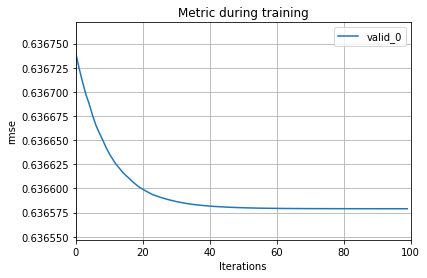

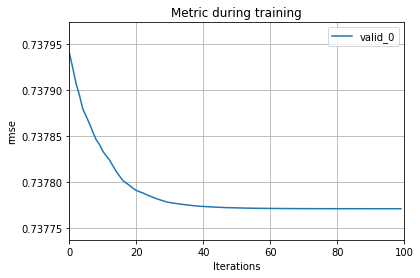

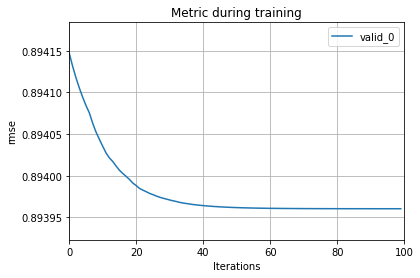

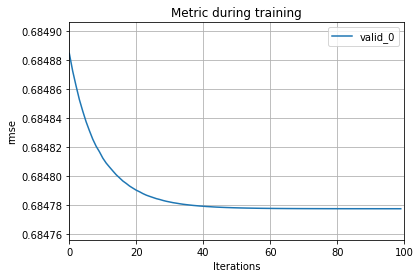

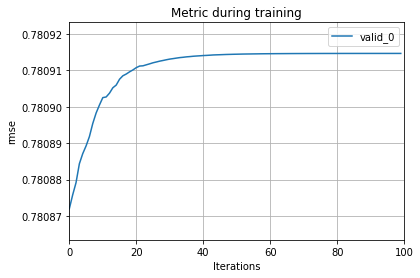

In [0]:
for trait in traits:
  evals_result = {}

  train_set = lgb.Dataset(X, y_df[trait])
  test_set = lgb.Dataset(X_t, y_test[trait])

  model2_lb = lgb.train(params, train_set = train_set, valid_sets = test_set, num_boost_round=100, evals_result=evals_result, callbacks=[es, print_ev, rate_decay])
  
  y_pred[trait] = model2_lb.predict(X_t, num_iteration = model2_lb.best_iteration)
  val_score = r2_score(y_test[trait], y_pred[trait])
  mse = mean_squared_error(y_test[trait], y_pred[trait])

  y_pred_train[trait] = model2_lb.predict(X, num_iteration = model2_lb.best_iteration)
  val_score_train = r2_score(y_df[trait], y_pred_train[trait])
  mse_train = mean_squared_error(y_df[trait], y_pred_train[trait])

  print("r2_score_test : ", val_score)
  print("r2_score_train : ", val_score_train)
  print("MSE_test : ", mse)
  print("MSE_train : ", mse_train)

  lgb.plot_metric(evals_result)
  
  with open(MODEL_PATH + 'LGBM/' + trait + '_model_lgbm.pkl', 'wb') as f:
            # Write the model to a file.
    pickle.dump(model2_lb, f)
  